In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import featuretools as ft

sns.set()
%matplotlib inline

In [2]:
raw_data=pd.read_csv('training-data.csv')
raw_data

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,6.60,733.500000,92.000000,7.000000,63.000000,5.300,13.275433,13.275433,60,30
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,6.48,733.600000,92.000000,6.666667,59.166667,5.200,18.606195,18.606195,60,30
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,6.37,733.700000,92.000000,6.333333,55.333333,5.100,28.642668,28.642668,50,30
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,6.25,733.800000,92.000000,6.000000,51.500000,5.000,45.410390,45.410390,50,40
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,6.13,733.900000,92.000000,5.666667,47.666667,4.900,10.084097,10.084097,60,40
5,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,...,6.02,734.000000,92.000000,5.333333,43.833333,4.800,44.919484,44.919484,50,40
6,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,...,5.90,734.100000,92.000000,5.000000,40.000000,4.700,47.233763,47.233763,60,50
7,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,...,5.92,734.166667,91.833333,5.166667,40.000000,4.680,33.039890,33.039890,60,50
8,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,...,5.93,734.233333,91.666667,5.333333,40.000000,4.670,31.455702,31.455702,60,40
9,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,...,5.95,734.300000,91.500000,5.500000,40.000000,4.650,3.089314,3.089314,70,40


In [3]:
raw_data.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,...,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,21.359107,39.400205,19.691226,40.181374,21.835004,38.568716,20.497864,37.906690,19.188418,50.435273,...,5.872876,754.570321,80.648776,4.043643,38.195641,2.507957,25.077253,25.077253,100.573381,4.131178
std,1.016804,3.199261,1.470947,3.375879,1.384605,2.498782,1.258512,3.434005,1.172714,8.634783,...,4.160335,7.959809,13.537571,2.442544,12.291776,3.299076,14.430529,14.430529,104.804907,8.197825
min,18.390000,27.733333,16.200000,25.763333,19.100000,32.626667,17.290000,27.660000,16.921429,35.363333,...,-4.800000,729.300000,31.000000,0.000000,1.000000,-6.500000,0.005322,0.005322,10.000000,0.000000
25%,20.700000,37.156667,18.700000,37.966667,20.700000,36.863333,19.600000,35.200000,18.200000,45.326667,...,2.830000,749.758333,71.000000,2.000000,28.333333,0.200000,12.700376,12.700376,50.000000,0.000000
50%,21.390000,39.090000,19.600000,40.156667,21.790000,38.200000,20.500000,37.700000,19.133333,48.000000,...,5.550000,754.600000,84.000000,3.666667,40.000000,2.470000,24.997071,24.997071,60.000000,0.000000
75%,22.100000,41.500000,20.600000,42.450000,22.790000,39.900000,21.426667,40.200000,20.200000,52.500000,...,8.800000,760.400000,92.000000,5.666667,40.000000,4.630000,37.539227,37.539227,100.000000,0.000000
max,23.856667,57.496667,24.600000,56.026667,27.600000,48.530000,23.760000,49.947500,22.926667,95.802222,...,19.700000,772.300000,100.000000,14.000000,66.000000,11.400000,49.996530,49.996530,1080.000000,70.000000


In [4]:
#We need to check info() to know if there's any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 28 columns):
T1             11999 non-null float64
RH_1           11999 non-null float64
T2             11999 non-null float64
RH_2           11999 non-null float64
T3             11999 non-null float64
RH_3           11999 non-null float64
T4             11999 non-null float64
RH_4           11999 non-null float64
T5             11999 non-null float64
RH_5           11999 non-null float64
T6             11999 non-null float64
RH_6           11999 non-null float64
T7             11999 non-null float64
RH_7           11999 non-null float64
T8             11999 non-null float64
RH_8           11999 non-null float64
T9             11999 non-null float64
RH_9           11999 non-null float64
T_out          11999 non-null float64
Press_mm_hg    11999 non-null float64
RH_out         11999 non-null float64
Windspeed      11999 non-null float64
Visibility     11999 non-null float64
Tdewpoint      11

In [5]:
y=raw_data['Appliances']
x1=raw_data.loc[:, :'rv2']

In [6]:
x1

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,17.033333,45.530000,6.60,733.500000,92.000000,7.000000,63.000000,5.300,13.275433,13.275433
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,17.066667,45.560000,6.48,733.600000,92.000000,6.666667,59.166667,5.200,18.606195,18.606195
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,17.000000,45.500000,6.37,733.700000,92.000000,6.333333,55.333333,5.100,28.642668,28.642668
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,17.000000,45.400000,6.25,733.800000,92.000000,6.000000,51.500000,5.000,45.410390,45.410390
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,17.000000,45.400000,6.13,733.900000,92.000000,5.666667,47.666667,4.900,10.084097,10.084097
5,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,...,17.000000,45.290000,6.02,734.000000,92.000000,5.333333,43.833333,4.800,44.919484,44.919484
6,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,...,17.000000,45.290000,5.90,734.100000,92.000000,5.000000,40.000000,4.700,47.233763,47.233763
7,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,...,17.000000,45.290000,5.92,734.166667,91.833333,5.166667,40.000000,4.680,33.039890,33.039890
8,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,...,17.000000,45.290000,5.93,734.233333,91.666667,5.333333,40.000000,4.670,31.455702,31.455702
9,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,...,17.000000,45.290000,5.95,734.300000,91.500000,5.500000,40.000000,4.650,3.089314,3.089314


In [7]:
y

0         60
1         60
2         50
3         50
4         60
5         50
6         60
7         60
8         60
9         70
10       230
11       580
12       430
13       250
14       100
15       100
16        90
17        70
18        80
19       140
20       120
21       190
22       110
23       110
24       110
25       110
26       100
27       100
28       100
29       100
        ... 
11969     60
11970     60
11971     60
11972     80
11973     80
11974     80
11975    100
11976     90
11977    110
11978    100
11979    110
11980    120
11981    120
11982    110
11983    110
11984    110
11985    110
11986    110
11987    100
11988    100
11989     90
11990     70
11991    100
11992    100
11993    120
11994    110
11995    110
11996    110
11997    110
11998    110
Name: Appliances, Length: 11999, dtype: int64

In [8]:
raw_data.iloc[:, :2]

,T1,RH_1
0,19.890000,47.596667
1,19.890000,46.693333
2,19.890000,46.300000
3,19.890000,46.066667
4,19.890000,46.333333
5,19.890000,46.026667
6,19.890000,45.766667
7,19.856667,45.560000
8,19.790000,45.597500
9,19.856667,46.090000


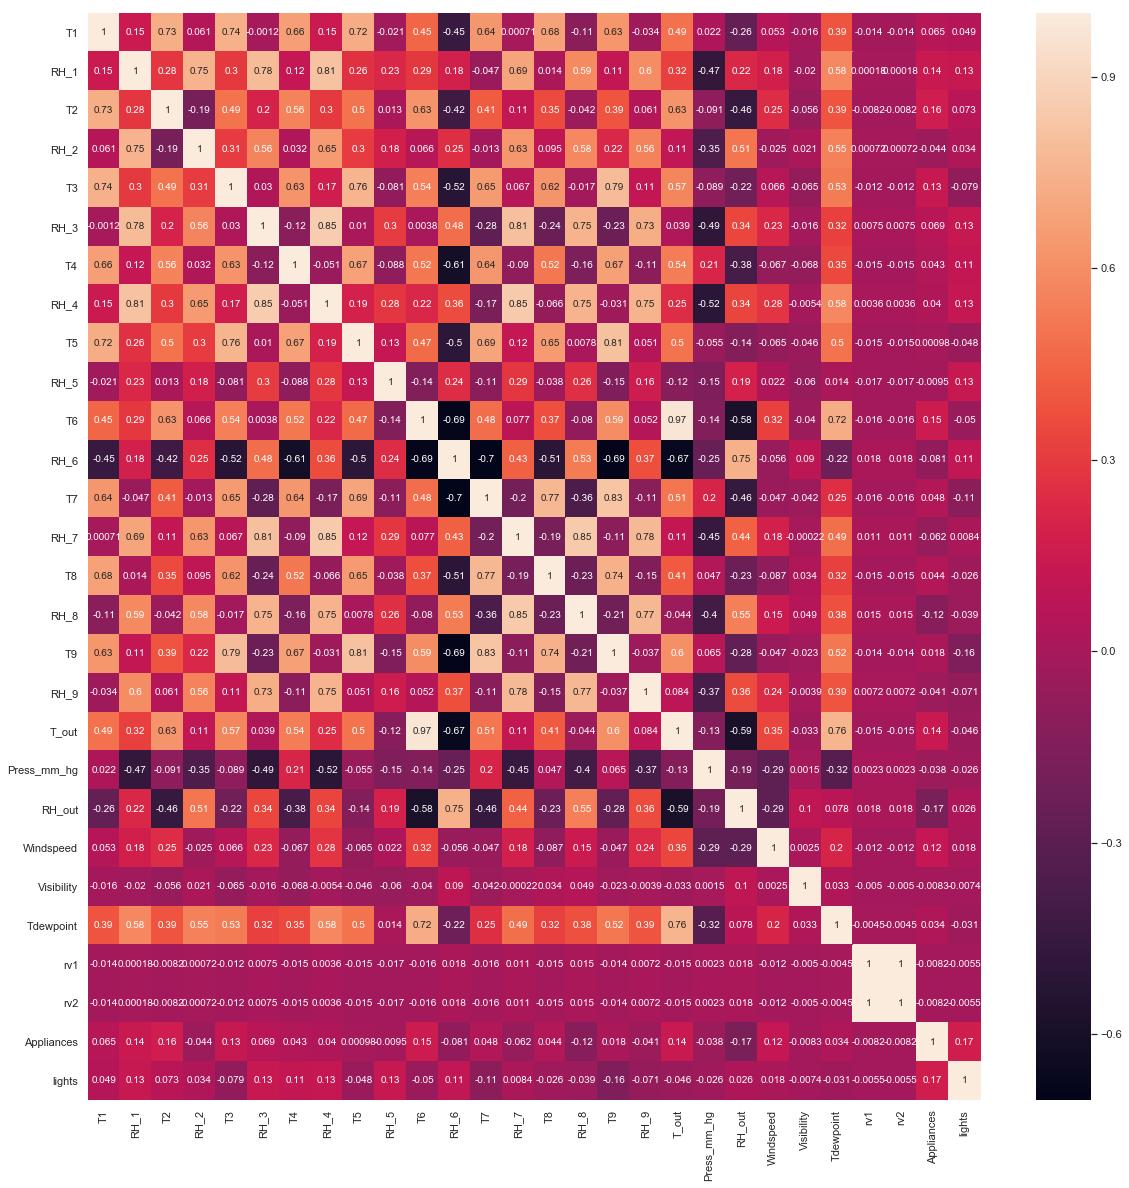

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(raw_data.corr(), annot=True, ax=ax)

## Scatter Plot
We use scatter plot to see the Correlation between Feature and Target

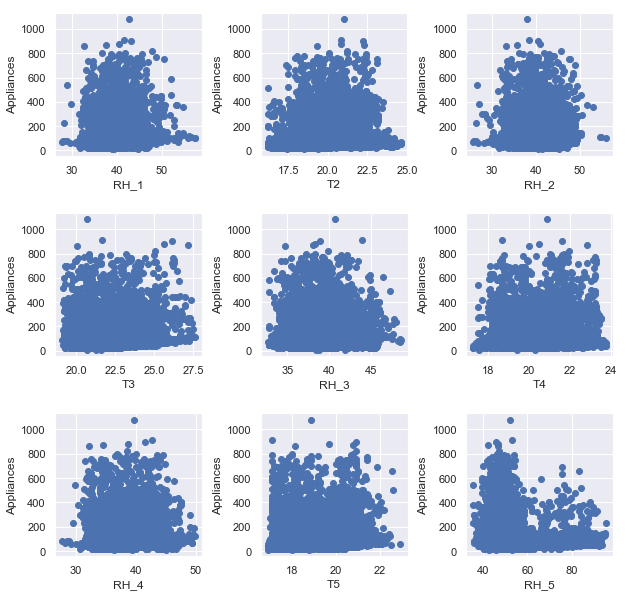

In [10]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 10):
    plt.subplot(3,3, i)
    plt.xlabel(raw_data.columns[i])
    plt.ylabel(raw_data.columns[-2])
    plt.scatter(x=raw_data.iloc[:, i], y=y)

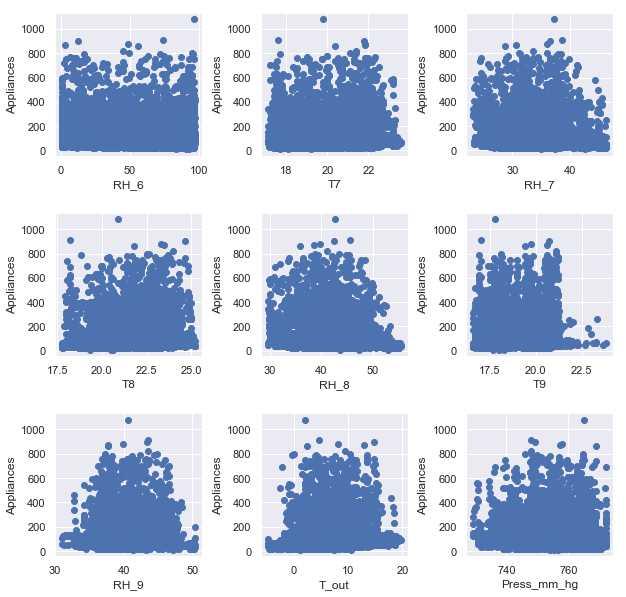

In [11]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(11, 20):
    plt.subplot(3,3, i-10)
    plt.xlabel(raw_data.columns[i])
    plt.ylabel(raw_data.columns[-2])
    plt.scatter(x=raw_data.iloc[:, i], y=y)

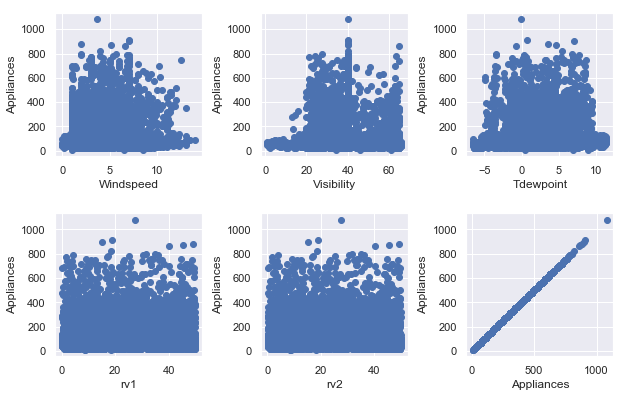

In [12]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(21, 27):
    plt.subplot(3,3, i-20)
    plt.xlabel(raw_data.columns[i])
    plt.ylabel(raw_data.columns[-2])
    plt.scatter(x=raw_data.iloc[:, i], y=y)

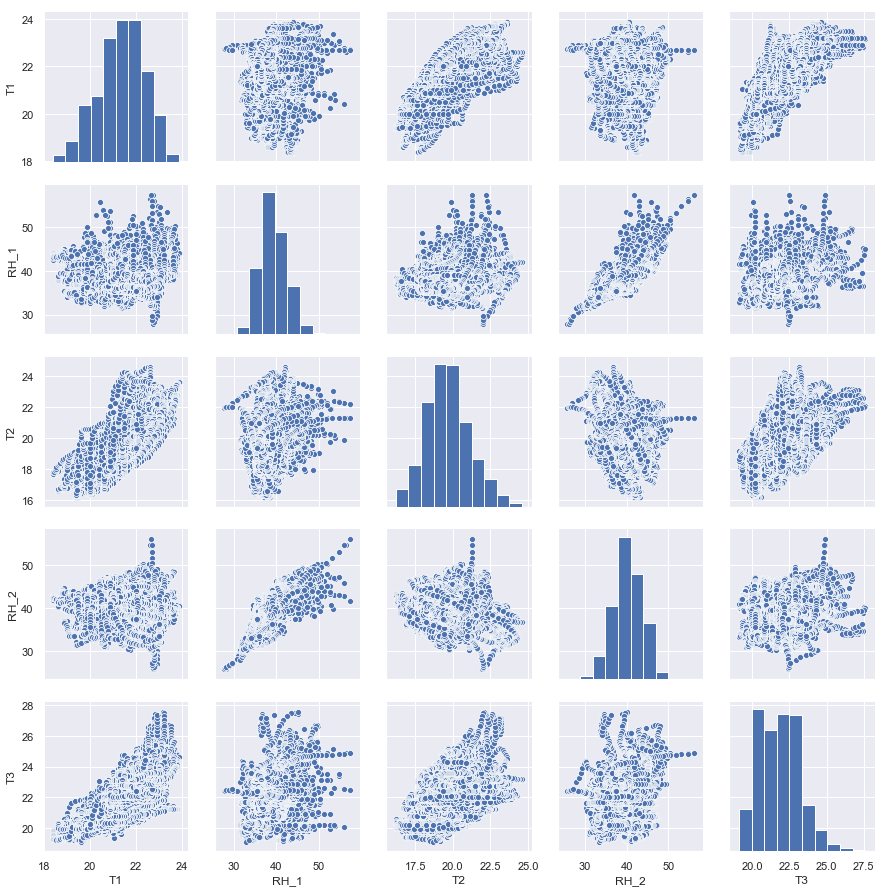

In [13]:
sns.pairplot(raw_data.iloc[:, :5]);

## Plot the Data Distribution

C:\Users\okzam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


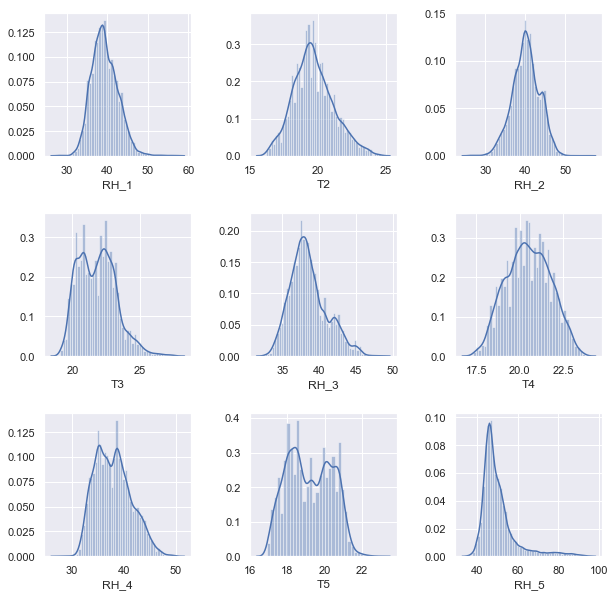

In [14]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 10):
    plt.subplot(3,3,i)
    sns.distplot(raw_data.iloc[:, i])

C:\Users\okzam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


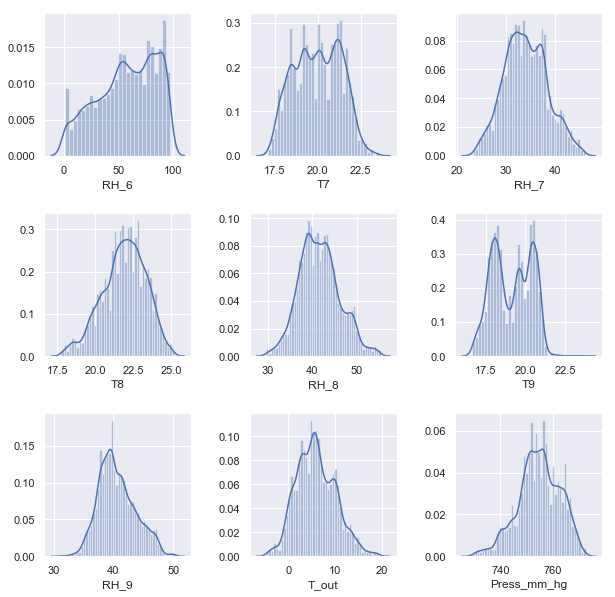

In [15]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(11, 20):
    plt.subplot(3,3,i-10)
    sns.distplot(raw_data.iloc[:, i])

C:\Users\okzam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


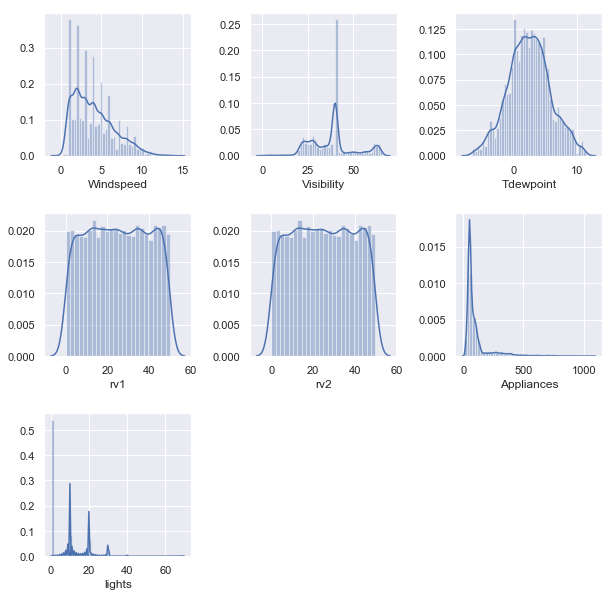

In [16]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(21, 28):
    plt.subplot(3,3,i-20)
    sns.distplot(raw_data.iloc[:, i])

## Normalize the Abnormal Data Distribution using Log Transformation
After visualize the data, we see that some of the features is not Normally Distributed. So we can normalize it by using log transformation.
Hence we want to list abnormal distribution of Features:
* RH_5
* Windspeed

C:\Users\okzam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


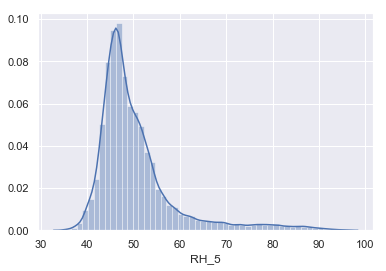

In [17]:
sns.distplot(raw_data.loc[:, 'RH_5'])

In [18]:
log_rh5 = raw_data[['RH_5']].applymap(lambda x: np.log(x+1))

In [19]:
log_rh5

,RH_5
0,4.028917
1,4.028917
2,4.026958
3,4.026958
4,4.026958
5,4.025887
6,4.024756
7,4.023564
8,4.025352
9,4.025352


C:\Users\okzam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


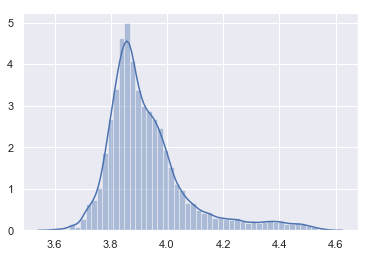

In [20]:
sns.distplot(log_rh5)

C:\Users\okzam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


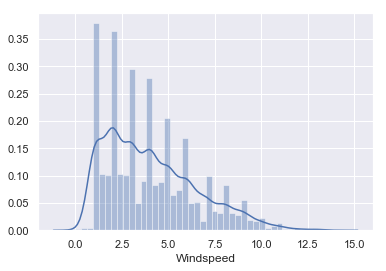

In [21]:
sns.distplot(raw_data.loc[:, 'Windspeed'])

In [22]:
log_windspeed = raw_data[['Windspeed']].applymap(lambda x: np.log(x+1))

In [23]:
log_windspeed.describe()

,Windspeed
count,11999.000000
mean,1.500432
std,0.491870
min,0.000000
25%,1.098612
50%,1.540445
75%,1.897120
max,2.708050


C:\Users\okzam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


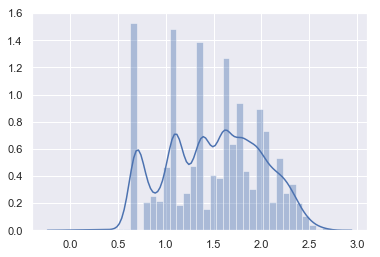

In [24]:
sns.distplot(log_windspeed)

In [25]:
copy_data = pd.DataFrame.copy(raw_data)

In [26]:
copy_data

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,6.60,733.500000,92.000000,7.000000,63.000000,5.300,13.275433,13.275433,60,30
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,6.48,733.600000,92.000000,6.666667,59.166667,5.200,18.606195,18.606195,60,30
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,6.37,733.700000,92.000000,6.333333,55.333333,5.100,28.642668,28.642668,50,30
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,6.25,733.800000,92.000000,6.000000,51.500000,5.000,45.410390,45.410390,50,40
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,6.13,733.900000,92.000000,5.666667,47.666667,4.900,10.084097,10.084097,60,40
5,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,...,6.02,734.000000,92.000000,5.333333,43.833333,4.800,44.919484,44.919484,50,40
6,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,...,5.90,734.100000,92.000000,5.000000,40.000000,4.700,47.233763,47.233763,60,50
7,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,...,5.92,734.166667,91.833333,5.166667,40.000000,4.680,33.039890,33.039890,60,50
8,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,...,5.93,734.233333,91.666667,5.333333,40.000000,4.670,31.455702,31.455702,60,40
9,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,...,5.95,734.300000,91.500000,5.500000,40.000000,4.650,3.089314,3.089314,70,40


In [27]:
copy_data['RH_5'] = log_rh5

In [28]:
copy_data['Windspeed'] = log_windspeed

In [29]:
copy_data

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,4.028917,...,6.60,733.500000,92.000000,2.079442,63.000000,5.300,13.275433,13.275433,60,30
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,4.028917,...,6.48,733.600000,92.000000,2.036882,59.166667,5.200,18.606195,18.606195,60,30
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,4.026958,...,6.37,733.700000,92.000000,1.992430,55.333333,5.100,28.642668,28.642668,50,30
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,4.026958,...,6.25,733.800000,92.000000,1.945910,51.500000,5.000,45.410390,45.410390,50,40
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,4.026958,...,6.13,733.900000,92.000000,1.897120,47.666667,4.900,10.084097,10.084097,60,40
5,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,4.025887,...,6.02,734.000000,92.000000,1.845827,43.833333,4.800,44.919484,44.919484,50,40
6,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,4.024756,...,5.90,734.100000,92.000000,1.791759,40.000000,4.700,47.233763,47.233763,60,50
7,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,4.023564,...,5.92,734.166667,91.833333,1.819158,40.000000,4.680,33.039890,33.039890,60,50
8,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,4.025352,...,5.93,734.233333,91.666667,1.845827,40.000000,4.670,31.455702,31.455702,60,40
9,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,4.025352,...,5.95,734.300000,91.500000,1.871802,40.000000,4.650,3.089314,3.089314,70,40


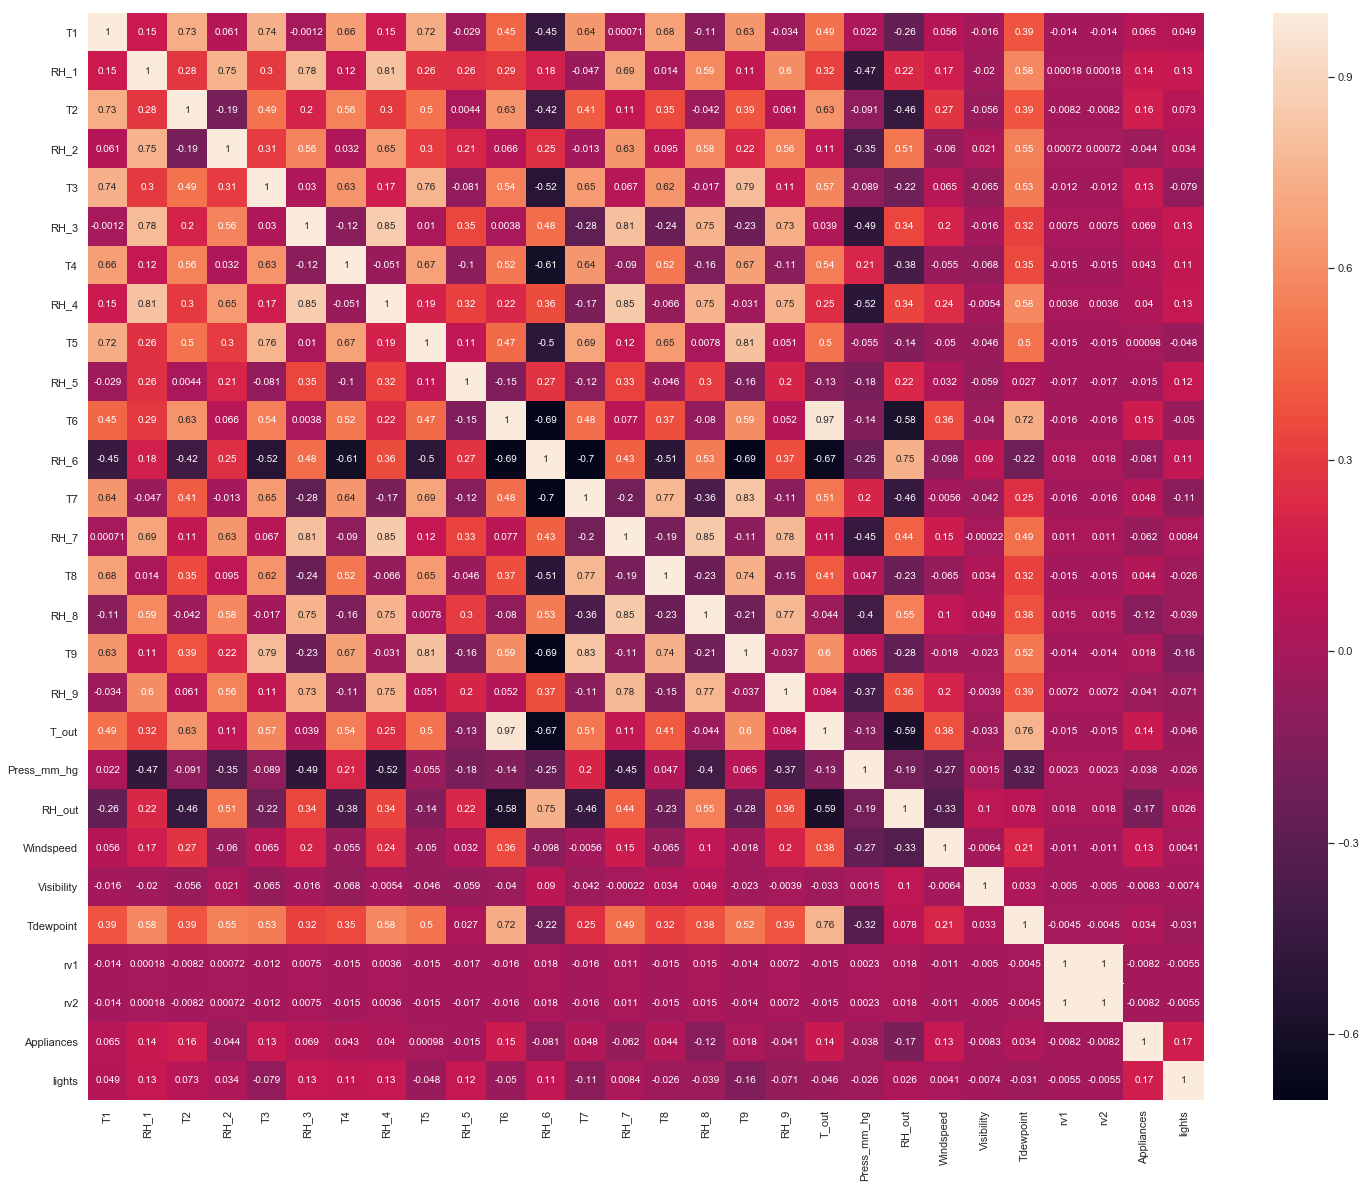

In [30]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(copy_data.corr(), annot=True, ax=ax)

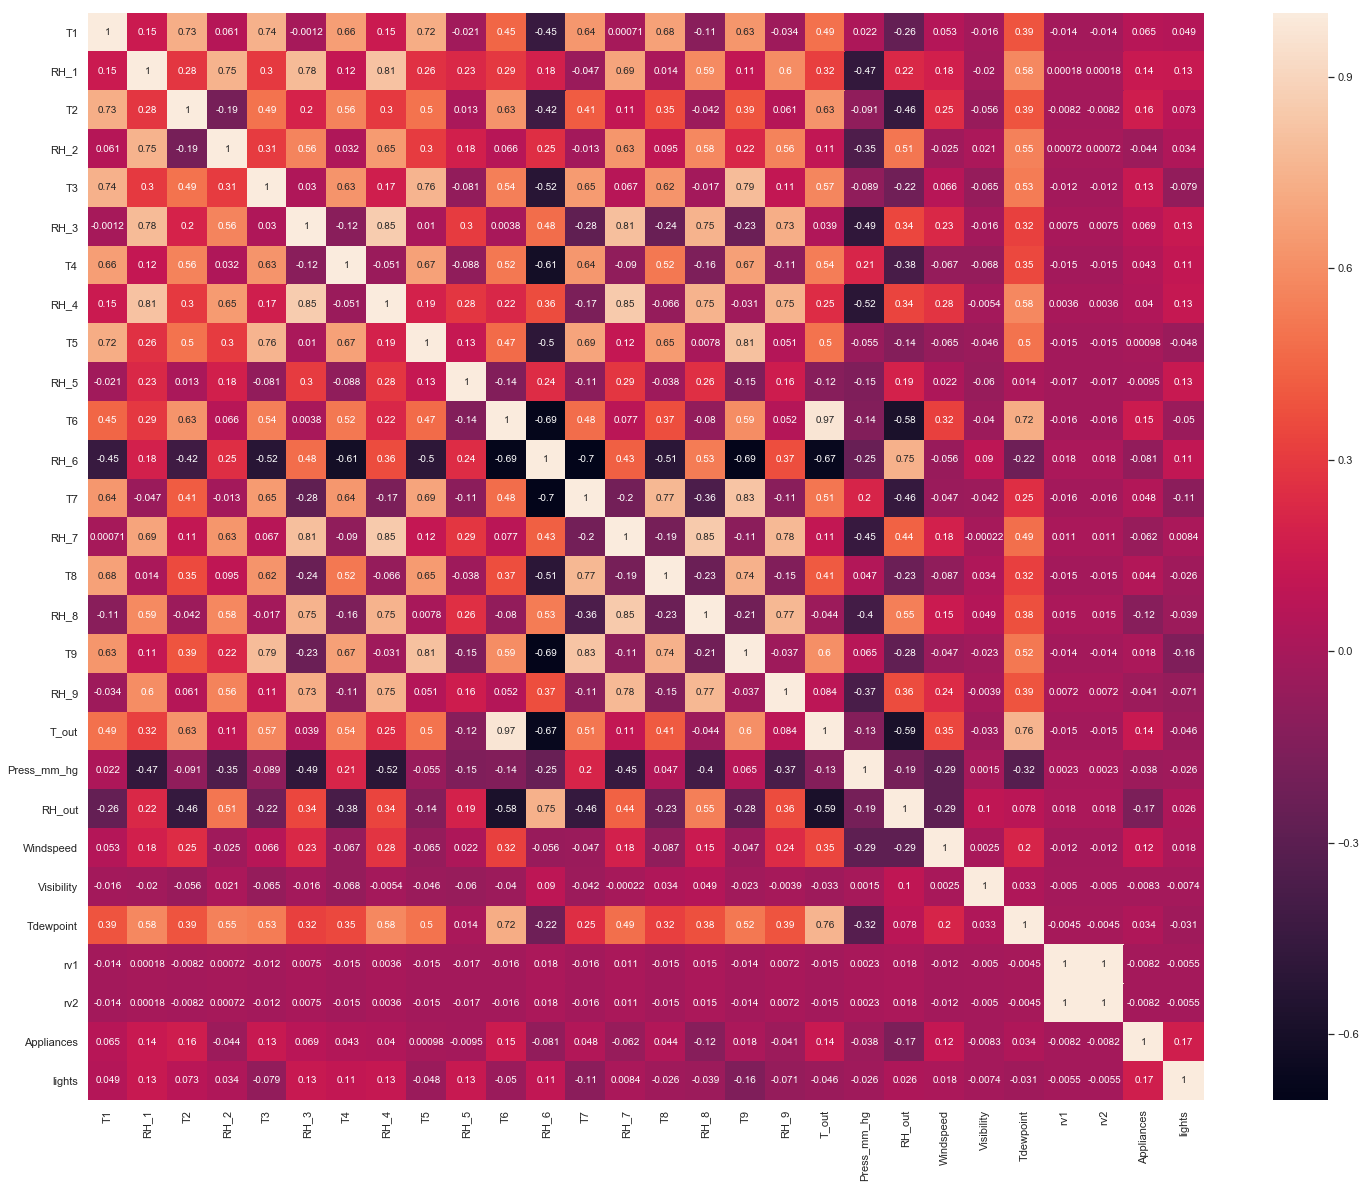

In [31]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(raw_data.corr(), annot=True, ax=ax)

## Boxplot to see the Outlier from Data

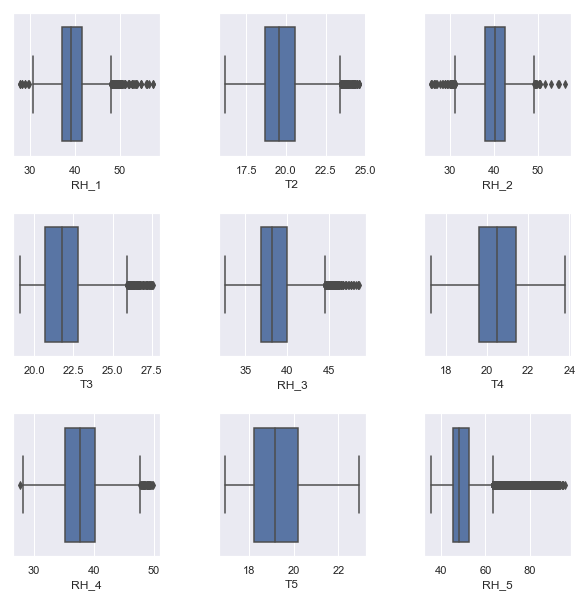

In [32]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 10):
    plt.subplot(3,3,i)
    sns.boxplot(raw_data.iloc[:, i])

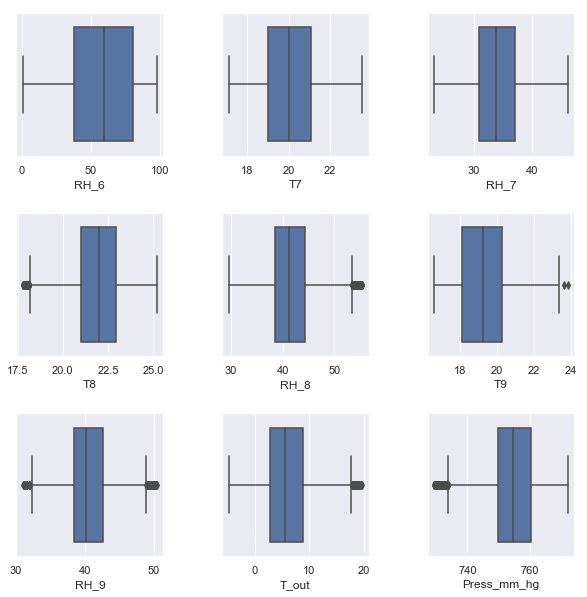

In [33]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(11, 20):
    plt.subplot(3,3,i-10)
    sns.boxplot(raw_data.iloc[:, i])

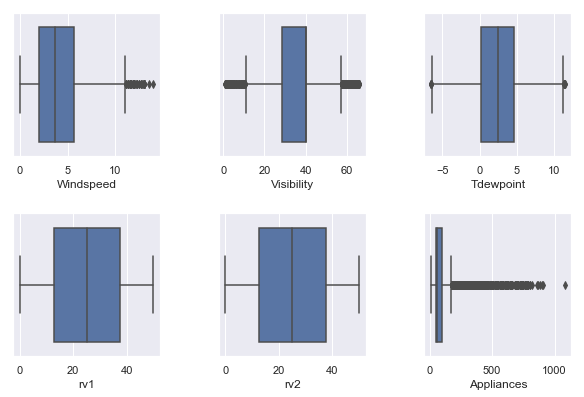

In [34]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(21, 27):
    plt.subplot(3,3,i-20)
    sns.boxplot(raw_data.iloc[:, i])

## Let's Remove the Outlier
As we see from the boxplot, there are many outliers from some Features. Thus, we need to remove it. We could remove it using 2 ways:
* IQR (Q3 - Q1)
* Z-Score

In [35]:
detect_outlier_data = pd.DataFrame.copy(raw_data)

In [36]:
detect_outlier_data

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,6.60,733.500000,92.000000,7.000000,63.000000,5.300,13.275433,13.275433,60,30
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,6.48,733.600000,92.000000,6.666667,59.166667,5.200,18.606195,18.606195,60,30
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,6.37,733.700000,92.000000,6.333333,55.333333,5.100,28.642668,28.642668,50,30
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,6.25,733.800000,92.000000,6.000000,51.500000,5.000,45.410390,45.410390,50,40
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,6.13,733.900000,92.000000,5.666667,47.666667,4.900,10.084097,10.084097,60,40
5,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,...,6.02,734.000000,92.000000,5.333333,43.833333,4.800,44.919484,44.919484,50,40
6,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,...,5.90,734.100000,92.000000,5.000000,40.000000,4.700,47.233763,47.233763,60,50
7,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,...,5.92,734.166667,91.833333,5.166667,40.000000,4.680,33.039890,33.039890,60,50
8,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,...,5.93,734.233333,91.666667,5.333333,40.000000,4.670,31.455702,31.455702,60,40
9,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,...,5.95,734.300000,91.500000,5.500000,40.000000,4.650,3.089314,3.089314,70,40


In [37]:
detect_outlier_data.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,...,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,21.359107,39.400205,19.691226,40.181374,21.835004,38.568716,20.497864,37.906690,19.188418,50.435273,...,5.872876,754.570321,80.648776,4.043643,38.195641,2.507957,25.077253,25.077253,100.573381,4.131178
std,1.016804,3.199261,1.470947,3.375879,1.384605,2.498782,1.258512,3.434005,1.172714,8.634783,...,4.160335,7.959809,13.537571,2.442544,12.291776,3.299076,14.430529,14.430529,104.804907,8.197825
min,18.390000,27.733333,16.200000,25.763333,19.100000,32.626667,17.290000,27.660000,16.921429,35.363333,...,-4.800000,729.300000,31.000000,0.000000,1.000000,-6.500000,0.005322,0.005322,10.000000,0.000000
25%,20.700000,37.156667,18.700000,37.966667,20.700000,36.863333,19.600000,35.200000,18.200000,45.326667,...,2.830000,749.758333,71.000000,2.000000,28.333333,0.200000,12.700376,12.700376,50.000000,0.000000
50%,21.390000,39.090000,19.600000,40.156667,21.790000,38.200000,20.500000,37.700000,19.133333,48.000000,...,5.550000,754.600000,84.000000,3.666667,40.000000,2.470000,24.997071,24.997071,60.000000,0.000000
75%,22.100000,41.500000,20.600000,42.450000,22.790000,39.900000,21.426667,40.200000,20.200000,52.500000,...,8.800000,760.400000,92.000000,5.666667,40.000000,4.630000,37.539227,37.539227,100.000000,0.000000
max,23.856667,57.496667,24.600000,56.026667,27.600000,48.530000,23.760000,49.947500,22.926667,95.802222,...,19.700000,772.300000,100.000000,14.000000,66.000000,11.400000,49.996530,49.996530,1080.000000,70.000000


In [38]:
#IQR = Q3-Q1
#We could Detect Outlier using IQR (Interquartile Range)
Q1 = detect_outlier_data.quantile(0.25)
Q3 = detect_outlier_data.quantile(0.75)
IQR = Q3-Q1

In [39]:
IQR

T1              1.400000
RH_1            4.343333
T2              1.900000
RH_2            4.483333
T3              2.090000
RH_3            3.036667
T4              1.826667
RH_4            5.000000
T5              2.000000
RH_5            7.173333
T6              6.737500
RH_6           42.487583
T7              2.100000
RH_7            6.236667
T8              1.915714
RH_8            5.969841
T9              2.190000
RH_9            4.190000
T_out           5.970000
Press_mm_hg    10.641667
RH_out         21.000000
Windspeed       3.666667
Visibility     11.666667
Tdewpoint       4.430000
rv1            24.838851
rv2            24.838851
Appliances     50.000000
lights          0.000000
dtype: float64

In [40]:
iqr_outlier = (detect_outlier_data < (Q1 - 1.5 * IQR)) |(detect_outlier_data > (Q3 + 1.5 * IQR))

In [41]:
iqr_outlier

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
0,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
2,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [42]:
z = np.abs(stats.zscore(detect_outlier_data))

In [43]:
z

array([[1.44488942, 2.56209297, 0.33396607, ..., 0.817871  , 0.38714859,
        3.1557031 ],
       [1.44488942, 2.27972428, 0.33396607, ..., 0.44844699, 0.38714859,
        3.1557031 ],
       [1.44488942, 2.15677408, 0.33396607, ..., 0.24708477, 0.48256794,
        3.1557031 ],
       ...,
       [0.66311134, 1.17955255, 0.13000726, ..., 0.52760699, 0.08994819,
        0.71592981],
       [0.6303275 , 1.22956619, 0.17986386, ..., 1.48166642, 0.08994819,
        0.50395684],
       [0.6303275 , 1.25040521, 0.22745425, ..., 1.24395545, 0.08994819,
        0.50395684]])

In [44]:
z < 3

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

## Detect Outlier using Z Score

In [45]:
no_outlier = detect_outlier_data[(z < 3).all(axis=1)]

In [46]:
no_outlier

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
30,21.500000,45.126667,20.790000,44.633333,20.390000,46.000000,19.666667,48.093333,18.963333,55.333333,...,5.60,735.800000,88.000000,6.000000,40.0,3.700,24.104006,24.104006,110,20
31,21.533333,44.966667,20.790000,44.360000,20.426667,45.933333,19.600000,47.500000,19.033333,54.093333,...,5.65,735.883333,87.833333,6.166667,40.0,3.720,29.978291,29.978291,400,20
32,21.600000,44.766667,20.890000,44.223333,20.500000,45.933333,19.696667,47.626667,19.100000,53.366667,...,5.70,735.966667,87.666667,6.333333,40.0,3.730,24.677065,24.677065,400,20
34,21.600000,44.360000,21.000000,43.833333,20.500000,45.730000,20.596667,47.223333,19.200000,51.990000,...,5.80,736.133333,87.333333,6.666667,40.0,3.770,41.368666,41.368666,240,20
35,21.600000,44.200000,21.000000,43.700000,20.500000,45.590000,20.996667,47.030000,19.222500,51.520000,...,5.85,736.216667,87.166667,6.833333,40.0,3.780,33.423337,33.423337,60,20
36,21.600000,44.200000,21.000000,43.590000,20.417500,45.545000,21.166667,46.526667,19.290000,51.230000,...,5.90,736.300000,87.000000,7.000000,40.0,3.800,39.711993,39.711993,60,20
37,21.600000,44.200000,21.000000,43.590000,20.390000,45.663333,21.033333,46.400000,19.290000,51.060000,...,5.80,736.400000,87.833333,6.833333,37.0,3.850,5.397181,5.397181,60,20
38,21.600000,44.200000,21.000000,43.700000,20.290000,45.730000,20.963333,46.433333,19.290000,50.933333,...,5.70,736.500000,88.666667,6.666667,34.0,3.900,36.185547,36.185547,50,10
39,21.500000,44.230000,20.926667,43.760000,20.290000,45.790000,20.865000,46.567500,19.290000,50.863333,...,5.60,736.600000,89.500000,6.500000,31.0,3.950,20.563721,20.563721,70,20
40,21.500000,44.363333,20.890000,43.845000,20.290000,45.790000,20.730000,46.590000,19.290000,50.790000,...,5.50,736.700000,90.333333,6.333333,28.0,4.000,41.047315,41.047315,60,20


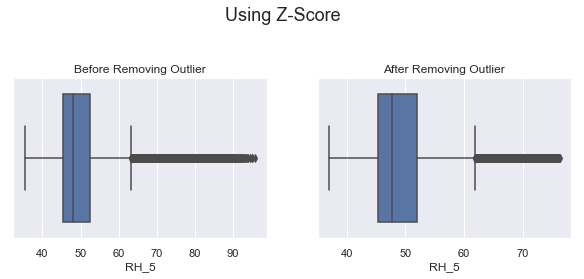

In [47]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using Z-Score', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'RH_5'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(no_outlier.loc[:, 'RH_5'])

## Detect Outlier using IQR

In [48]:
iqr_no_outlier = detect_outlier_data[~iqr_outlier.any(axis=1)]

In [49]:
iqr_no_outlier

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
154,20.100000,44.260000,19.200000,43.290000,19.890000,44.400000,20.100000,42.845000,17.500000,51.000000,...,5.00,744.900000,89.000000,6.333333,40.000000,3.300,25.022049,25.022049,40,0
155,20.100000,44.200000,19.245000,43.245000,19.890000,44.326667,19.963333,42.590000,17.500000,51.090000,...,4.90,744.950000,90.000000,6.166667,40.000000,3.350,9.043318,9.043318,30,0
156,20.100000,44.126667,19.290000,43.095000,19.790000,44.090000,19.890000,42.590000,17.500000,51.090000,...,4.80,745.000000,91.000000,6.000000,40.000000,3.400,26.481530,26.481530,50,0
157,20.100000,44.060000,19.370000,42.920000,19.790000,44.090000,19.856667,42.560000,17.500000,51.000000,...,4.75,745.033333,91.333333,6.166667,40.000000,3.400,3.763787,3.763787,50,0
158,20.100000,44.000000,19.390000,42.900000,19.790000,44.126667,19.790000,42.500000,17.500000,51.000000,...,4.70,745.066667,91.666667,6.333333,40.000000,3.400,13.887797,13.887797,60,0
159,20.100000,43.900000,19.390000,42.760000,19.790000,44.200000,19.760000,42.530000,17.500000,51.000000,...,4.65,745.100000,92.000000,6.500000,40.000000,3.400,10.634976,10.634976,50,0
160,20.100000,43.826667,19.390000,42.700000,19.790000,44.200000,19.700000,42.530000,17.500000,51.000000,...,4.60,745.133333,92.333333,6.666667,40.000000,3.400,14.239524,14.239524,60,0
161,20.033333,43.730000,19.390000,42.663333,19.790000,44.200000,19.666667,42.560000,17.500000,50.966667,...,4.55,745.166667,92.666667,6.833333,40.000000,3.400,44.754705,44.754705,60,0
162,20.100000,43.730000,19.390000,42.530000,19.790000,44.290000,19.600000,42.500000,17.500000,50.900000,...,4.50,745.200000,93.000000,7.000000,40.000000,3.400,22.311766,22.311766,60,0
163,20.066667,43.490000,19.356667,42.500000,19.790000,44.290000,19.600000,42.500000,17.500000,50.863333,...,4.53,745.316667,92.666667,6.833333,40.000000,3.400,38.999244,38.999244,50,0


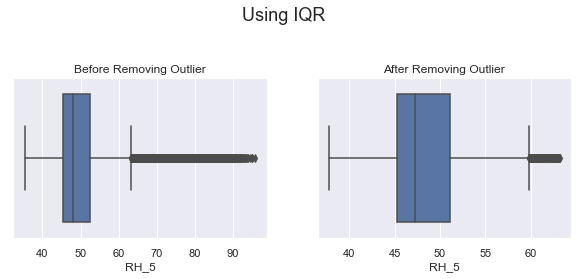

In [50]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using IQR', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'RH_5'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(iqr_no_outlier.loc[:, 'RH_5'])

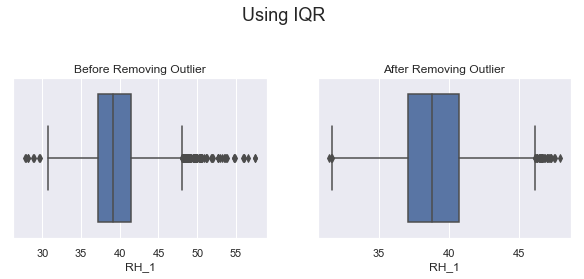

In [51]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using IQR', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'RH_1'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(iqr_no_outlier.loc[:, 'RH_1'])

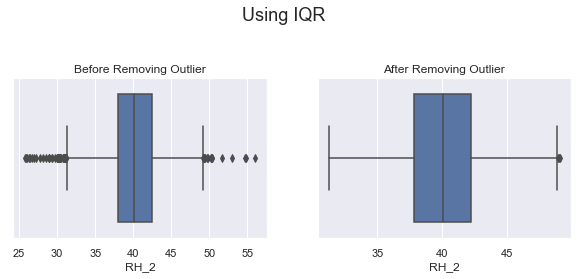

In [52]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using IQR', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'RH_2'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(iqr_no_outlier.loc[:, 'RH_2'])

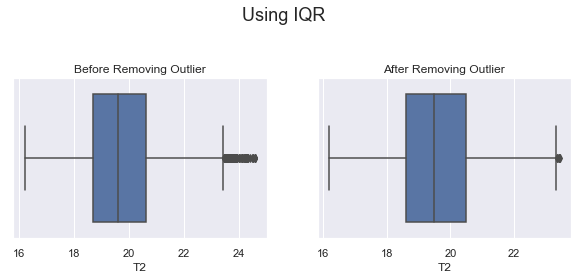

In [53]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using IQR', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'T2'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(iqr_no_outlier.loc[:, 'T2'])

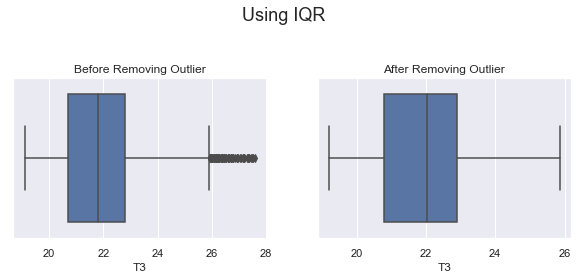

In [54]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using IQR', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'T3'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(iqr_no_outlier.loc[:, 'T3'])

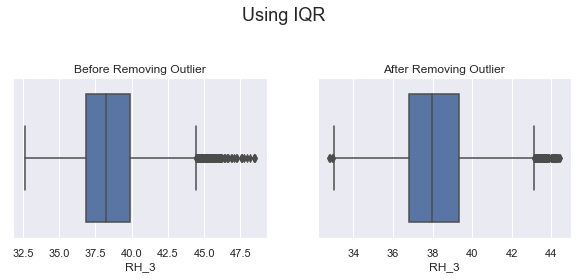

In [55]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using IQR', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'RH_3'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(iqr_no_outlier.loc[:, 'RH_3'])

In [56]:
iqr_no_outlier

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
154,20.100000,44.260000,19.200000,43.290000,19.890000,44.400000,20.100000,42.845000,17.500000,51.000000,...,5.00,744.900000,89.000000,6.333333,40.000000,3.300,25.022049,25.022049,40,0
155,20.100000,44.200000,19.245000,43.245000,19.890000,44.326667,19.963333,42.590000,17.500000,51.090000,...,4.90,744.950000,90.000000,6.166667,40.000000,3.350,9.043318,9.043318,30,0
156,20.100000,44.126667,19.290000,43.095000,19.790000,44.090000,19.890000,42.590000,17.500000,51.090000,...,4.80,745.000000,91.000000,6.000000,40.000000,3.400,26.481530,26.481530,50,0
157,20.100000,44.060000,19.370000,42.920000,19.790000,44.090000,19.856667,42.560000,17.500000,51.000000,...,4.75,745.033333,91.333333,6.166667,40.000000,3.400,3.763787,3.763787,50,0
158,20.100000,44.000000,19.390000,42.900000,19.790000,44.126667,19.790000,42.500000,17.500000,51.000000,...,4.70,745.066667,91.666667,6.333333,40.000000,3.400,13.887797,13.887797,60,0
159,20.100000,43.900000,19.390000,42.760000,19.790000,44.200000,19.760000,42.530000,17.500000,51.000000,...,4.65,745.100000,92.000000,6.500000,40.000000,3.400,10.634976,10.634976,50,0
160,20.100000,43.826667,19.390000,42.700000,19.790000,44.200000,19.700000,42.530000,17.500000,51.000000,...,4.60,745.133333,92.333333,6.666667,40.000000,3.400,14.239524,14.239524,60,0
161,20.033333,43.730000,19.390000,42.663333,19.790000,44.200000,19.666667,42.560000,17.500000,50.966667,...,4.55,745.166667,92.666667,6.833333,40.000000,3.400,44.754705,44.754705,60,0
162,20.100000,43.730000,19.390000,42.530000,19.790000,44.290000,19.600000,42.500000,17.500000,50.900000,...,4.50,745.200000,93.000000,7.000000,40.000000,3.400,22.311766,22.311766,60,0
163,20.066667,43.490000,19.356667,42.500000,19.790000,44.290000,19.600000,42.500000,17.500000,50.863333,...,4.53,745.316667,92.666667,6.833333,40.000000,3.400,38.999244,38.999244,50,0


In [59]:
iqr_no_outlier.loc[:, 'Appliances'].describe()

count    6148.00000
mean       63.56864
std        25.61082
min        10.00000
25%        50.00000
50%        60.00000
75%        70.00000
max       170.00000
Name: Appliances, dtype: float64